<h1 style="color:#b57c01;">[Pie Chart] 財政部出口統計</h1>

In [87]:
#pip install --upgrade nbformat


In [88]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
from matplotlib.ticker import LogLocator, FuncFormatter
import matplotlib.pyplot as plt

from dotenv import load_dotenv

plt.rcParams["font.family"] = 'WenQuanYi Zen Hei'

input_file ="mof_export_statistic.csv"


load_dotenv()


data_path = os.environ.get("PROCESSED_DATA_DIR")

fPath = os.path.join ( data_path, input_file ) 
df = pd.read_csv ( fPath )
df= df.fillna(0)


In [89]:
cols_name = df.columns
cols_name

Index(['國家/地區別', '總計', '1.活動物；動物產品', '(1)水產品', '2.植物產品', '(1)食用蔬菜',
       '(2)食用果實及堅果', '3.動植物油脂', '4.調製食品；飲料及菸酒', '(1)調製食品', '(2)飲料、酒類及醋',
       '(3)菸及菸葉代用品', '5.礦產品', '(1)石油煉製品', '6.化學品', '(1)有機化學品', '7.塑膠、橡膠及其製品',
       '(1)塑膠原料', '(2)塑膠製品', '(3)橡膠及其製品', '8.毛皮及其製品', '9.木及木製品',
       '10.紙漿；紙及其製品；印刷品', '11.紡織品', '(1)紗布', '12.鞋、帽及其他飾品', '13.非金屬礦物製品',
       '14.珠寶及貴金屬製品', '15.基本金屬及其製品', '(1)鋼鐵及其製品', '(2)其他基本金屬及其製品',
       '16.機械及電機設備', '(1)電子零組件', '(2)機械', '(3)電機產品', '(4)資通與視聽產品', '(5)家用電器',
       '17.運輸工具', '18.光學及精密儀器；鐘錶；樂器', '(1)光學及精密儀器', '19.其他', '(1)家具',
       '(2)玩具與運動用品', '月', '年'],
      dtype='object')

In [90]:
CLstr = "國家/地區別"

df[CLstr].unique()

array(['亞洲', '中國大陸', '香港', '日本', '南韓', '新南向18國(註1)', '東協10國', '泰國',
       '馬來西亞', '印尼', '菲律賓', '新加坡', '越南', '汶萊', '緬甸', '柬埔寨', '寮國', '南亞',
       '印度', '巴基斯坦', '孟加拉', '斯里蘭卡', '尼泊爾', '不丹', '哈薩克', '中東', '伊朗', '伊拉克',
       '以色列', '科威特', '阿曼', '卡達', '沙烏地阿拉伯', '土耳其', '阿拉伯聯合大公國', '北美洲', '美國',
       '加拿大', '中美洲', '墨西哥', '南美洲', '巴西', '智利', '秘魯', '歐洲', '德國', '法國',
       '荷蘭', '英國', '俄羅斯', '奧地利', '比利時', '匈牙利', '義大利', '波蘭', '西班牙', '瑞典',
       '瑞士', '烏克蘭', '歐盟(註2)', '東歐', '非洲', '阿爾及利亞', '安哥拉', '埃及', '南非',
       '肯亞', '奈及利亞', '大洋洲', '澳大利亞', '巴布亞紐幾內亞', '紐西蘭'], dtype=object)

In [91]:
#import plotly.io as 機械及電機設備pio
#pio.renderers.default = "browser" # 設定渲染器為瀏覽器
# 
# Settings
topN = 10
CLstr = "國家/地區別"
colName = "總計" #"16.機械及電機設備" 

fig_title=f"年度國家財政部出口統計 {colName} Top {topN}"


df = df[~df[ CLstr ].isin( ["北美洲","亞洲", "新南向18國(註1)", "東協10國", "中美洲" , "歐盟(註2)"] ) ]


In [92]:
# Aggregate by year per country
df_yearly = df.groupby(['年', CLstr], as_index=False)[colName].sum()

#Rank Top N per year
df_yearly['rank'] = df_yearly.groupby('年')[colName].rank(method='first', ascending=False)
df_topN = df_yearly[df_yearly['rank'] <= topN].copy()

#Sort for plotting
df_topN = df_topN.sort_values(['年', colName], ascending=[True, False])
df_topN["年"] = df_topN["年"].astype(str)  # make sure frame names are string

#Create figure
fig = px.bar(
    df_topN,
    x=colName,
    y=CLstr,
    color=CLstr,
    orientation='h',
    animation_frame="年",
    animation_group=CLstr,
    title= fig_title,

    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=900,
    height=600,
    range_x=[0, df_topN[colName].max() * 1.1],  # dynamic x-axis max
)

#Update each frame for dynamic y-axis ordering and text labels
for frame in fig.frames:
    year_data = df_topN[df_topN["年"] == frame.name].sort_values(colName, ascending=True)
    
    # Update y-axis order
    frame.layout.yaxis = dict(
        categoryorder="array",
        categoryarray=year_data[CLstr].tolist()#,
        #autorange='reversed'  # top bar at top
    )
    
    
#Layout
fig.update_layout(
    title= fig_title,
    xaxis_title=colName,
    yaxis_title=CLstr,
)

fig.update_layout(
    yaxis=dict(
        categoryorder="array",
        categoryarray=[]#,
        #autorange='reversed'  # <-- this flips the bars so top bar is at top
    )
)

#Slow down animation
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2500  # 2.5 sec per frame

#Show figure
fig.show()




In [93]:
df_topN[df_topN["年"] == 114].sort_values(colName, ascending=False)

,年,國家/地區別,總計,rank


In [94]:
df_topN[ [ CLstr , "年" , colName , "rank" ] ]
df_topN.head(120)

,年,國家/地區別,總計,rank
1,104,中國大陸,73270118,1.0
64,104,香港,39116308,2.0
52,104,美國,34448479,3.0
37,104,歐洲,25869495,4.0
33,104,日本,19556522,5.0
...,...,...,...,...
725,114,馬來西亞,37698520,6.0
693,114,日本,30014304,7.0
672,114,南韓,26617292,8.0
679,114,墨西哥,21982519,9.0


In [95]:
df_selected = df[ df[CLstr]=="日本" ]
df_selected = df.groupby(['年', CLstr], as_index=False)[colName].sum()

df_selected [ [ CLstr, "年" , colName ] ]

,國家/地區別,年,總計
0,不丹,104,158
1,中國大陸,104,73270118
2,中東,104,6969850
3,以色列,104,610811
4,伊拉克,104,42386
...,...,...,...
721,阿曼,114,264553
722,阿爾及利亞,114,99459
723,非洲,114,1486605
724,香港,114,70392820


{'中國大陸': '#66c5cc', '香港': '#f6cf71', '美國': '#f89c74', '歐洲': '#dcb0f2', '日本': '#87c55f', '新加坡': '#9eb9f3', '南韓': '#fe88b1', '越南': '#c9db74', '菲律賓': '#8be0a4', '馬來西亞': '#b497e7', '德國': '#b3b3b3', '荷蘭': '#66c5cc', '大洋洲': '#f6cf71', '泰國': '#f89c74', '墨西哥': '#dcb0f2'}
       年 國家/地區別         總計  rank
712  114     美國  198271906   1.0
661  114   中國大陸  100085599   2.0
724  114     香港   70392820   3.0
697  114     歐洲   41290433   4.0
692  114    新加坡   40404320   5.0
725  114   馬來西亞   37698520   6.0
693  114     日本   30014304   7.0
672  114     南韓   26617292   8.0
679  114    墨西哥   21982519   9.0
719  114     越南   18167589  10.0
Saved chart to bar_chart_animation_output/bar_chart_114.svg


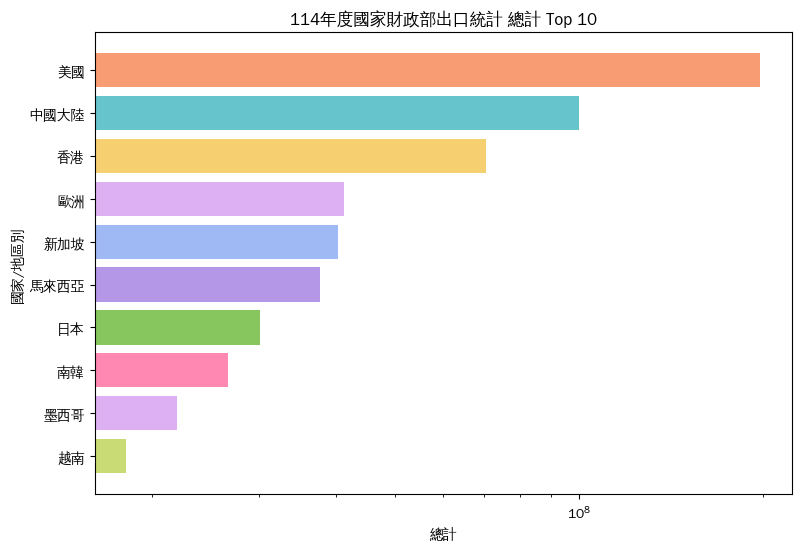

       年 國家/地區別         總計  rank
646  113     美國  111361914   1.0
595  113   中國大陸   96953212   2.0
658  113     香港   53635460   3.0
631  113     歐洲   38628925   4.0
626  113    新加坡   33741480   5.0
627  113     日本   25830238   6.0
606  113     南韓   20790607   7.0
659  113   馬來西亞   19888019   8.0
653  113     越南   14274984   9.0
637  113     泰國   11819781  10.0
Saved chart to bar_chart_animation_output/bar_chart_113.svg


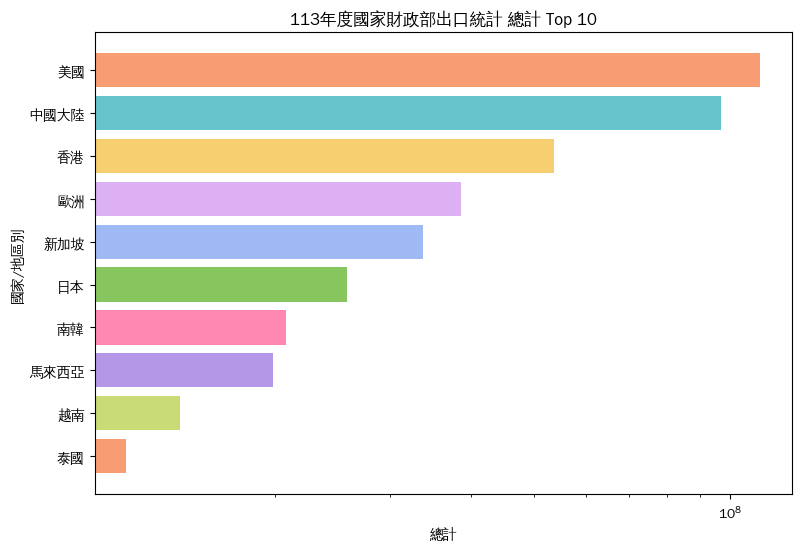

       年 國家/地區別        總計  rank
529  112   中國大陸  95725727   1.0
580  112     美國  76234038   2.0
592  112     香港  56513014   3.0
565  112     歐洲  42283483   4.0
561  112     日本  31434886   5.0
560  112    新加坡  29738313   6.0
540  112     南韓  18203299   7.0
593  112   馬來西亞  15165841   8.0
584  112     荷蘭  12926796   9.0
587  112     越南  11725257  10.0
Saved chart to bar_chart_animation_output/bar_chart_112.svg


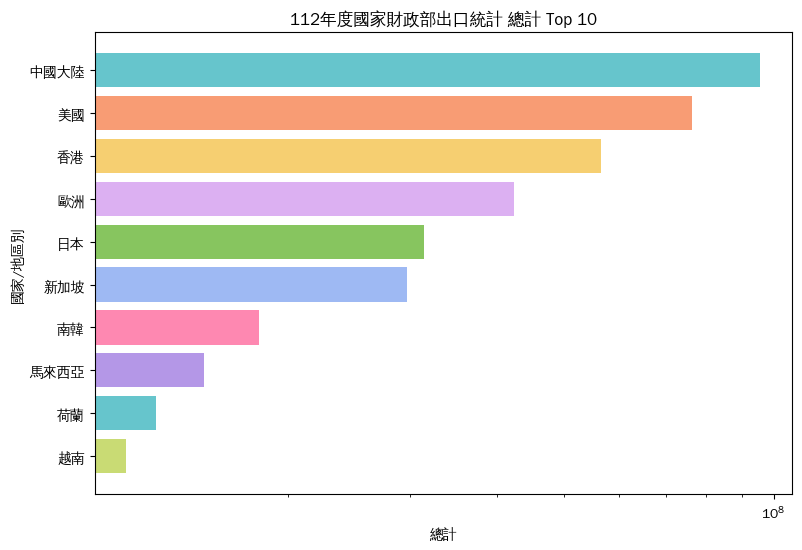

       年 國家/地區別         總計  rank
463  111   中國大陸  121092996   1.0
514  111     美國   75052059   2.0
526  111     香港   64782182   3.0
499  111     歐洲   41099083   4.0
495  111     日本   33608899   5.0
494  111    新加坡   29522660   6.0
474  111     南韓   22178146   7.0
527  111   馬來西亞   17013703   8.0
521  111     越南   14574219   9.0
482  111    大洋洲    9053629  10.0
Saved chart to bar_chart_animation_output/bar_chart_111.svg


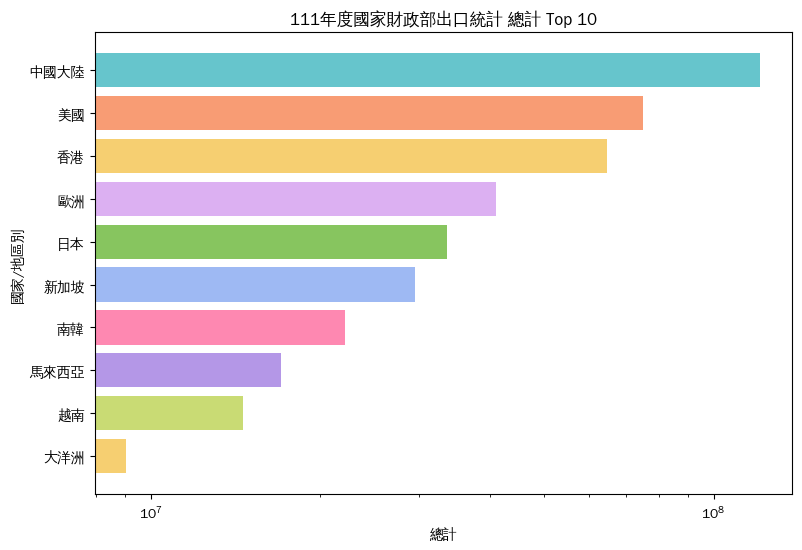

       年 國家/地區別         總計  rank
397  110   中國大陸  125902555   1.0
448  110     美國   65685966   2.0
460  110     香港   62972006   3.0
433  110     歐洲   38484236   4.0
429  110     日本   29206218   5.0
428  110    新加坡   25718674   6.0
408  110     南韓   20140178   7.0
455  110     越南   13966601   8.0
461  110   馬來西亞   13327838   9.0
426  110     德國    8172971  10.0
Saved chart to bar_chart_animation_output/bar_chart_110.svg


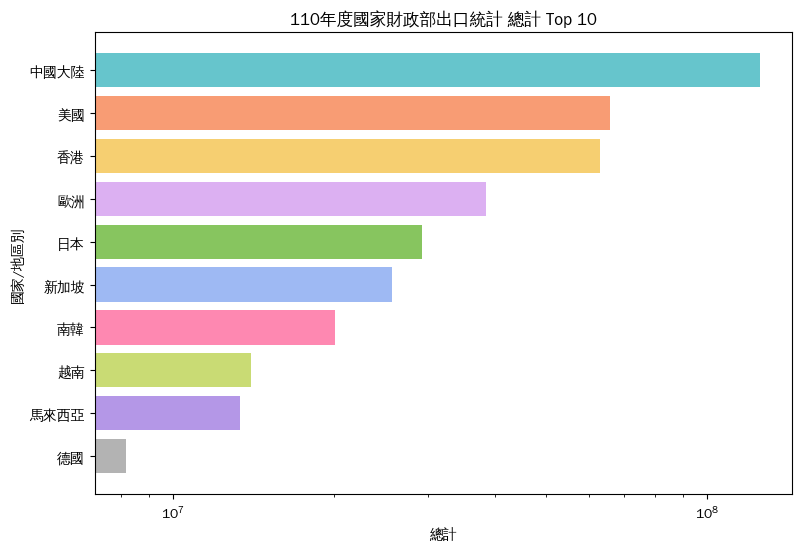

       年 國家/地區別         總計  rank
331  109   中國大陸  102446179   1.0
382  109     美國   50549921   2.0
394  109     香港   48935181   3.0
367  109     歐洲   28143108   4.0
363  109     日本   23398254   5.0
362  109    新加坡   19083955   6.0
342  109     南韓   15140525   7.0
389  109     越南   10521227   8.0
395  109   馬來西亞    9458244   9.0
386  109     荷蘭    6047225  10.0
Saved chart to bar_chart_animation_output/bar_chart_109.svg


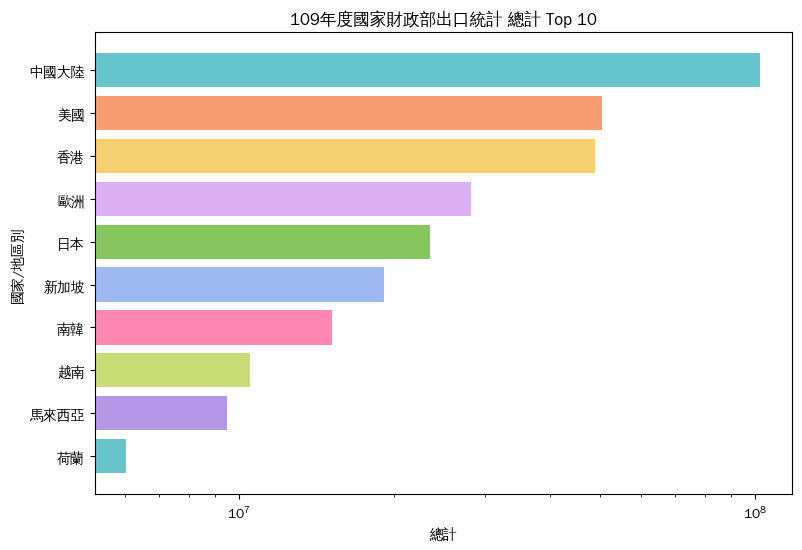

       年 國家/地區別        總計  rank
265  108   中國大陸  91789357   1.0
316  108     美國  46247108   2.0
328  108     香港  40325208   3.0
301  108     歐洲  29770314   4.0
297  108     日本  23278741   5.0
296  108    新加坡  18183980   6.0
276  108     南韓  16917052   7.0
323  108     越南  10771752   8.0
329  108   馬來西亞   9399840   9.0
294  108     德國   6522200  10.0
Saved chart to bar_chart_animation_output/bar_chart_108.svg


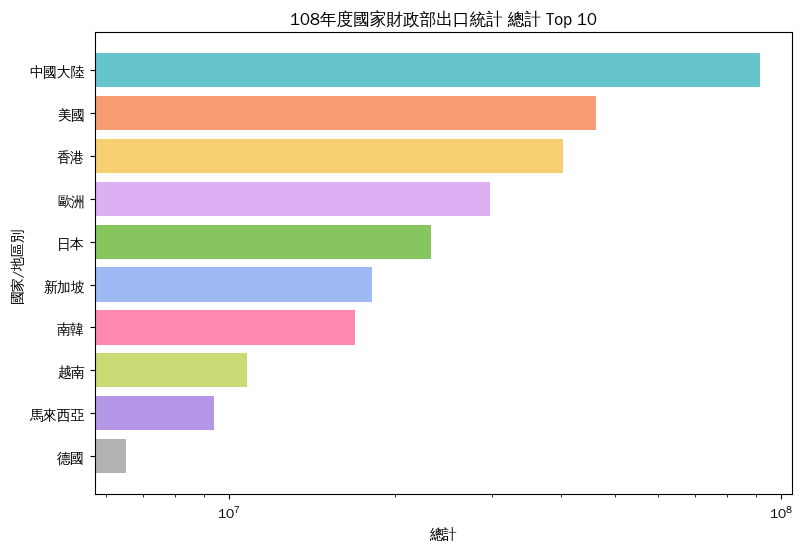

       年 國家/地區別        總計  rank
199  107   中國大陸  96497850   1.0
262  107     香港  41400954   2.0
250  107     美國  39490380   3.0
235  107     歐洲  31277632   4.0
231  107     日本  22800957   5.0
230  107    新加坡  17324072   6.0
210  107     南韓  15738931   7.0
257  107     越南  10770602   8.0
263  107   馬來西亞  10601675   9.0
255  107    菲律賓   8942334  10.0
Saved chart to bar_chart_animation_output/bar_chart_107.svg


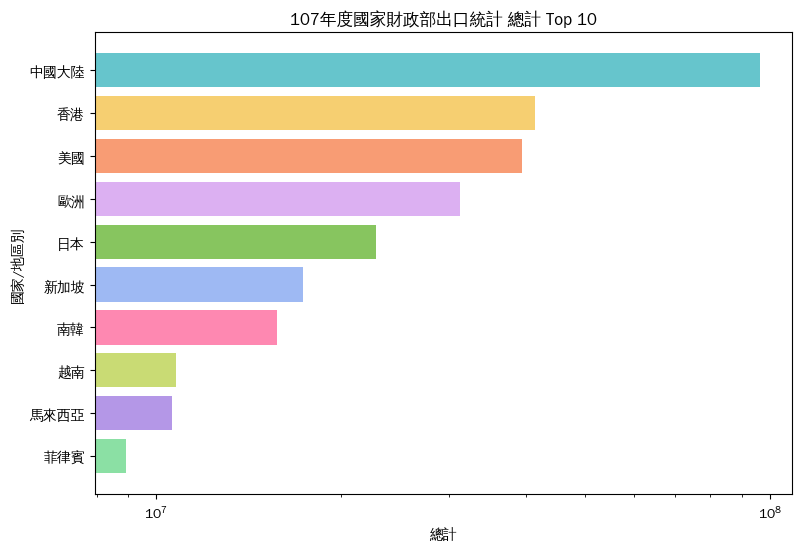

       年 國家/地區別        總計  rank
133  106   中國大陸  88745404   1.0
196  106     香港  41165189   2.0
184  106     美國  36772593   3.0
169  106     歐洲  28778050   4.0
165  106     日本  20573772   5.0
164  106    新加坡  17619613   6.0
144  106     南韓  14415736   7.0
191  106     越南  10456687   8.0
197  106   馬來西亞  10368478   9.0
189  106    菲律賓   9592794  10.0
Saved chart to bar_chart_animation_output/bar_chart_106.svg


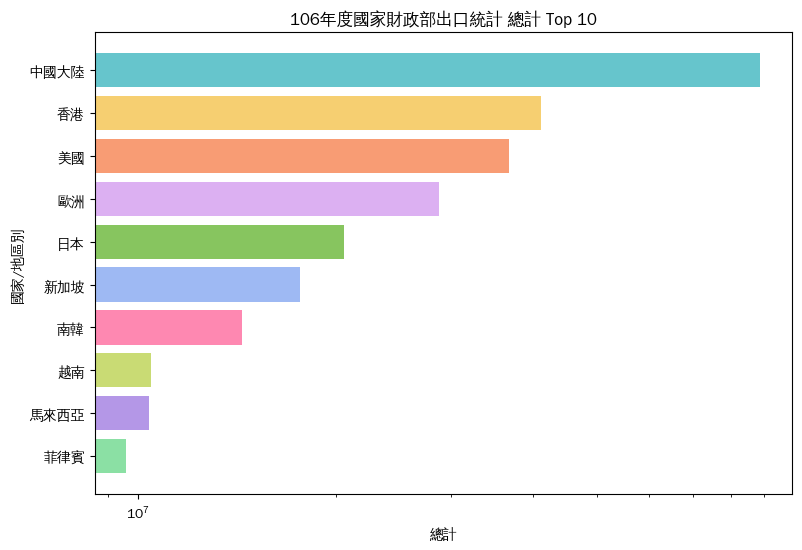

       年 國家/地區別        總計  rank
67   105   中國大陸  73732229   1.0
130  105     香港  38253914   2.0
118  105     美國  33396311   3.0
103  105     歐洲  26123541   4.0
99   105     日本  19470701   5.0
98   105    新加坡  16147227   6.0
78   105     南韓  12531227   7.0
125  105     越南   9511294   8.0
123  105    菲律賓   8659120   9.0
131  105   馬來西亞   7814116  10.0
Saved chart to bar_chart_animation_output/bar_chart_105.svg


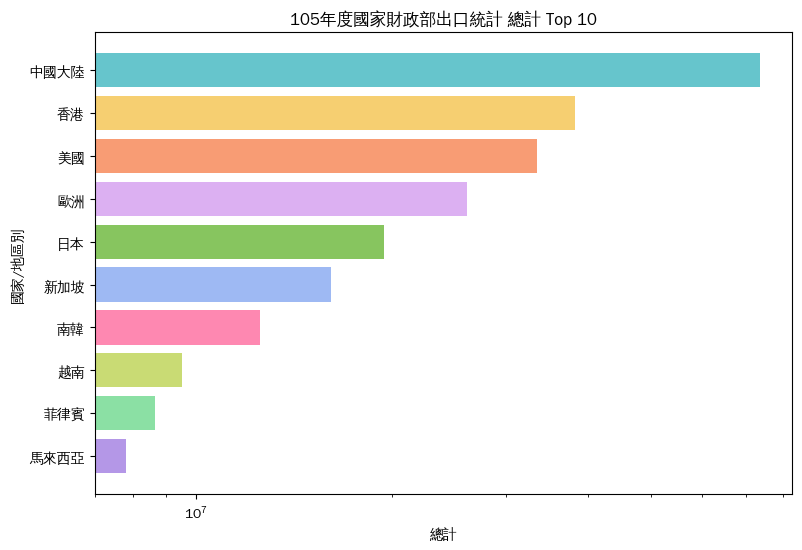

      年 國家/地區別        總計  rank
1   104   中國大陸  73270118   1.0
64  104     香港  39116308   2.0
52  104     美國  34448479   3.0
37  104     歐洲  25869495   4.0
33  104     日本  19556522   5.0
32  104    新加坡  17396074   6.0
12  104     南韓  12772060   7.0
59  104     越南   9675233   8.0
57  104    菲律賓   7513737   9.0
65  104   馬來西亞   7196851  10.0
Saved chart to bar_chart_animation_output/bar_chart_104.svg


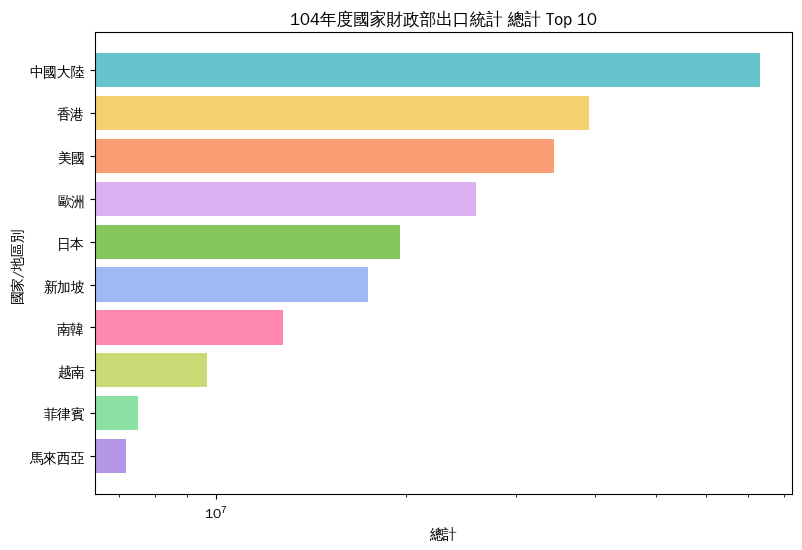

In [96]:
import itertools

def save_fig( year , folder="bar_chart_animation_output", filename_prefix='bar_chart', ext='svg' ):
    if not os.path.exists(folder):
        os.makedirs(folder)
    filepath = os.path.join(folder, f"{filename_prefix}_{year}.{ext}")
    plt.savefig(filepath, format=ext, bbox_inches='tight')
    print(f"Saved chart to {filepath}")

# Formatter for "M" units
def millions_formatter(x, pos):
    if x >= 1e6:
        return f"{x/1e6:.0f}M" if x >= 1e7 else f"{x/1e6:.1f}M"
    else:
        return f"{x/1e6:.2f}M"

# Function to convert "rgb(r, g, b)" to hex
def rgb_to_hex(rgb):
    r, g, b = map(int, rgb[4:-1].split(','))
    return f"#{r:02x}{g:02x}{b:02x}"

# Get countries
countries = df_topN[CLstr].unique()

# Get Plotly Pastel colors
pastel_colors = px.colors.qualitative.Pastel

# Convert any "rgb(...)" to hex
pastel_colors_hex = [rgb_to_hex(c) if c.startswith("rgb") else c for c in pastel_colors]

# Assign colors to countries, cycling if needed
import itertools
color_cycle = itertools.cycle(pastel_colors_hex)
country_colors = {country: next(color_cycle) for country in countries}

print(country_colors)

def pltBrChart(df, year):

    plt.figure(figsize=(9, 6))
    
    y = df[colName]
    x = df[CLstr]
    
    # Use the pre-defined color for each country
    colors = [country_colors[c] for c in x]
    plt.barh(x, y, color=colors)
    
    plt.gca().invert_yaxis()
    plt.xscale('log')
    
    plt.title( f"{year}{fig_title}" )
    plt.xlabel( colName )
    plt.ylabel( CLstr )
    save_fig( year )

    plt.show()



# Plot for multiple years
for year in range(114, 103, -1):
    year_str = str(year)  # convert int to string
    df_year = df_topN[df_topN['年'] == year_str]
    print( df_year )
    if not df_year.empty:
        pltBrChart(df_year, year_str)
    else:
        print(f"No data for year {year_str}")


